## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:


##### - Which variables are significant in predicting the demand for shared bikes.
##### - How well those variables describe the bike demands


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
#IMPORTING THE LIBRARIES

import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
sns.set()
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### Let's import the dataset

In [2]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## COLUMN DESCRIPTION

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
#### Our target variable is cnt

Let's understand the shape of the dataset

In [4]:
data.shape

(730, 16)

We have 730 rows and 16 columns in the dataset.

Now, let's start with the very first step of our modellling that is Exploratory Data Analysis.

## Exploratory Data Analysis

First let's find out if there's any missing values in our dataset

In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In our dataset there's no missing values.

Now let's fix some few cateogrical variables for analysis

In [6]:
data['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'}, inplace=True)
data['weathersit'].replace({1:'Clear',2:'Mist',3:'Light Snow', 4:'Heavy Rain'}, inplace=True)
data['mnth'].replace({1:"jan",2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}
                    ,inplace=True)
data['weekday'].replace({0:'Sun',1:'Mon',2:'Tues', 3:'Wed', 4:'Thurs', 5:"Fri", 6:'Sat'}, inplace=True)
data['yr'].replace({0:'2018', 1:'2019'}, inplace=True)
data['holiday'].replace({0:'Not holiday', 1:'holiday'}, inplace=True)
data['workingday'].replace({0:'Not working day', 1:'workingday'}, inplace=True)

In [7]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,jan,Not holiday,Mon,workingday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,jan,Not holiday,Tues,workingday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,jan,Not holiday,Wed,workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,jan,Not holiday,Thurs,workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,jan,Not holiday,Fri,workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
data.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730,730,730,730,730,730,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20-03-2019,fall,2018,may,Not holiday,Mon,workingday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,365,62,709,105,504,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


#### Let's visualise the categorical variables with respect to our target variables

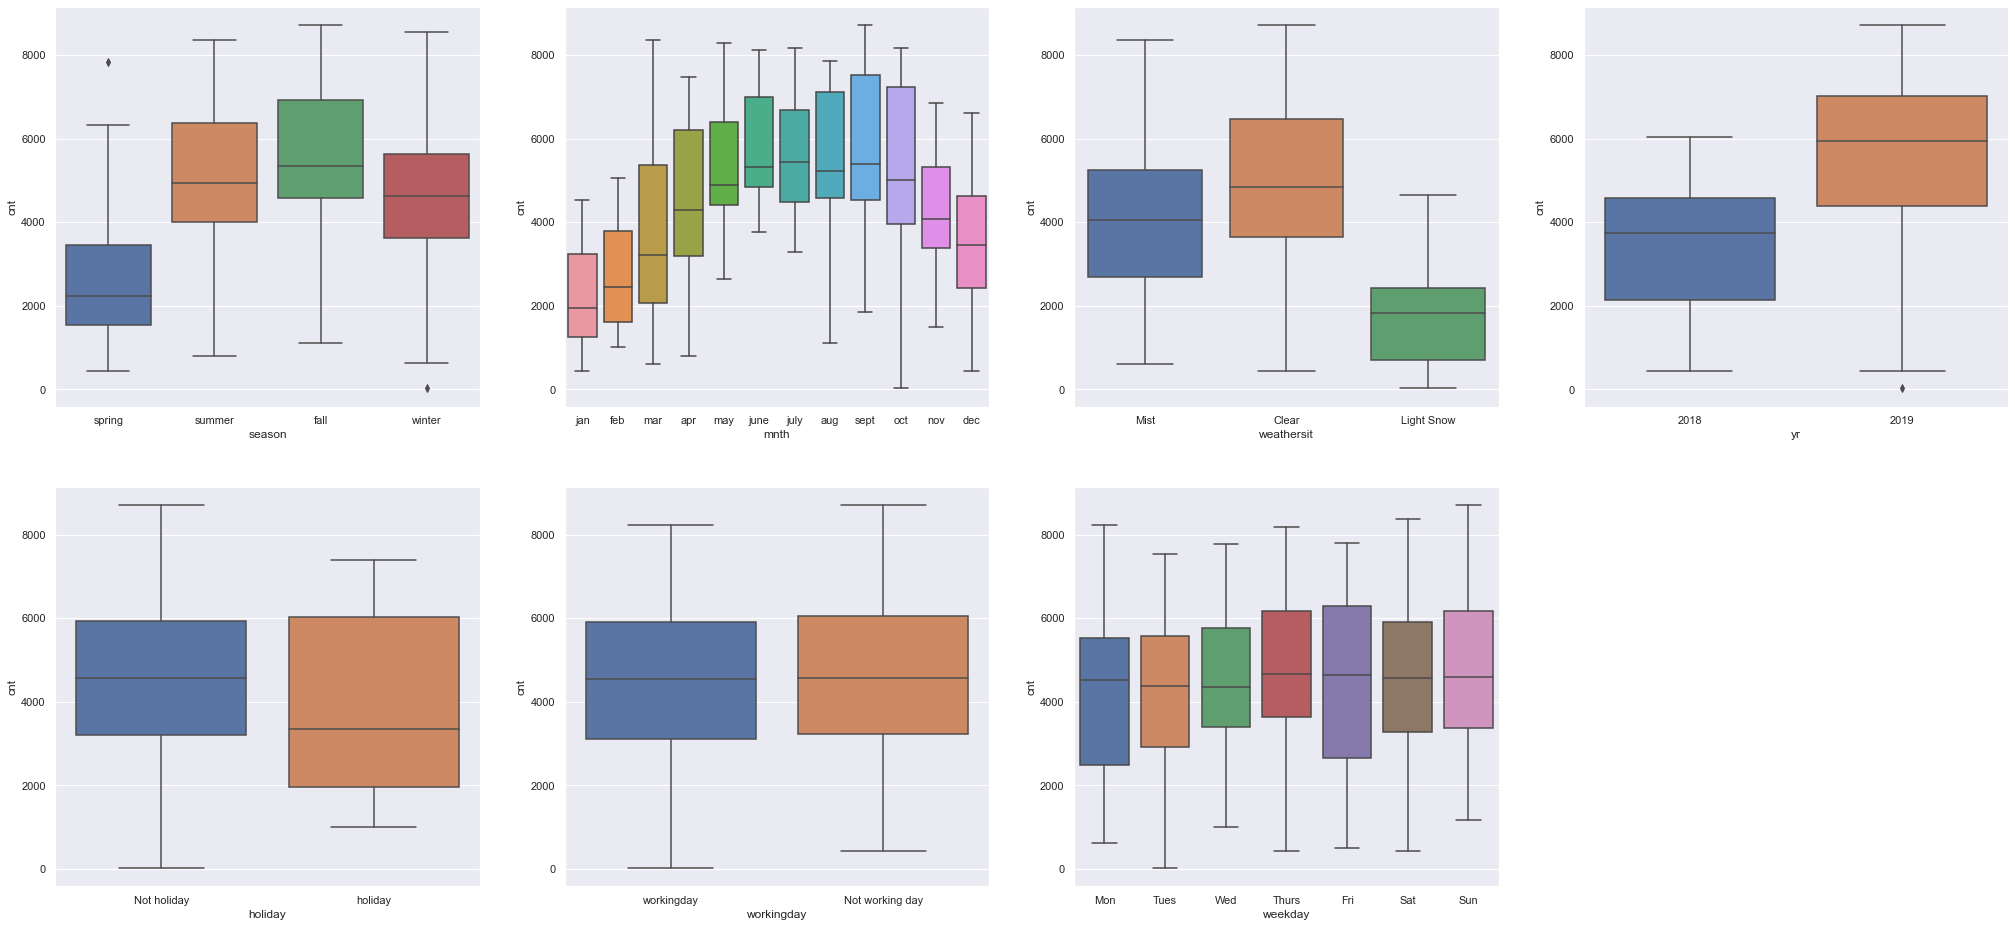

In [9]:
plt.figure(figsize=(35,25))
plt.subplot(3,4,1)
sns.boxplot(x='season', y='cnt', data = data)
plt.subplot(3,4,2)
sns.boxplot(x='mnth', y='cnt', data = data)
plt.subplot(3,4,3)
sns.boxplot(x='weathersit', y='cnt', data = data)
plt.subplot(3,4,4)
sns.boxplot(x='yr', y='cnt', data = data)
plt.subplot(3,4,5)
sns.boxplot(x='holiday', y='cnt', data = data)
plt.subplot(3,4,6)
sns.boxplot(x='workingday', y='cnt', data = data)
plt.subplot(3,4,7)
sns.boxplot(x='weekday', y='cnt', data = data)
plt.show()


##### Inferences from the above diagram

- 1. In the first boxplot that displays the relationship between seasons and cnt, we can find out that in the season fall, the demand is high. So, the pattern we observe is the demand starts rising from spring  to summer and then to fall. Fall is the maturity stage, after which the demand declines i.e. means that the count of rental bike increases till fall and after that it decreases. 

- 2. In the second boxplot, which tells us about the relationship between months and cnt, we can observe that the highest number of demand is in the month of june. 

- 3. In the third boxplot, which displays the relationship/pattern between weathersit and cnt, we can observe that the highest number of demand is when the weather is clear.

- 4. In the fourth boxplot, the relationship is between years and our target variables. We can observe that the count of rental bikes increases( demand of rental bikes ) from next year onwards. 

- 5. In the 5th boxplot, the relationship is between holiday and cnt, we can observe that when there's holiday the demand decreases

- 6. In the 6th boxplot, we can observe that the demand is almost same. It does'nt matter if its a working day or not. 

- 7. In the 7th boxplot, we can see that it doesn't matter which day it is. It's almost same. It does'nt give any clear indication if it increases or decreases. But from the table, we can infer that the top day is sunday.

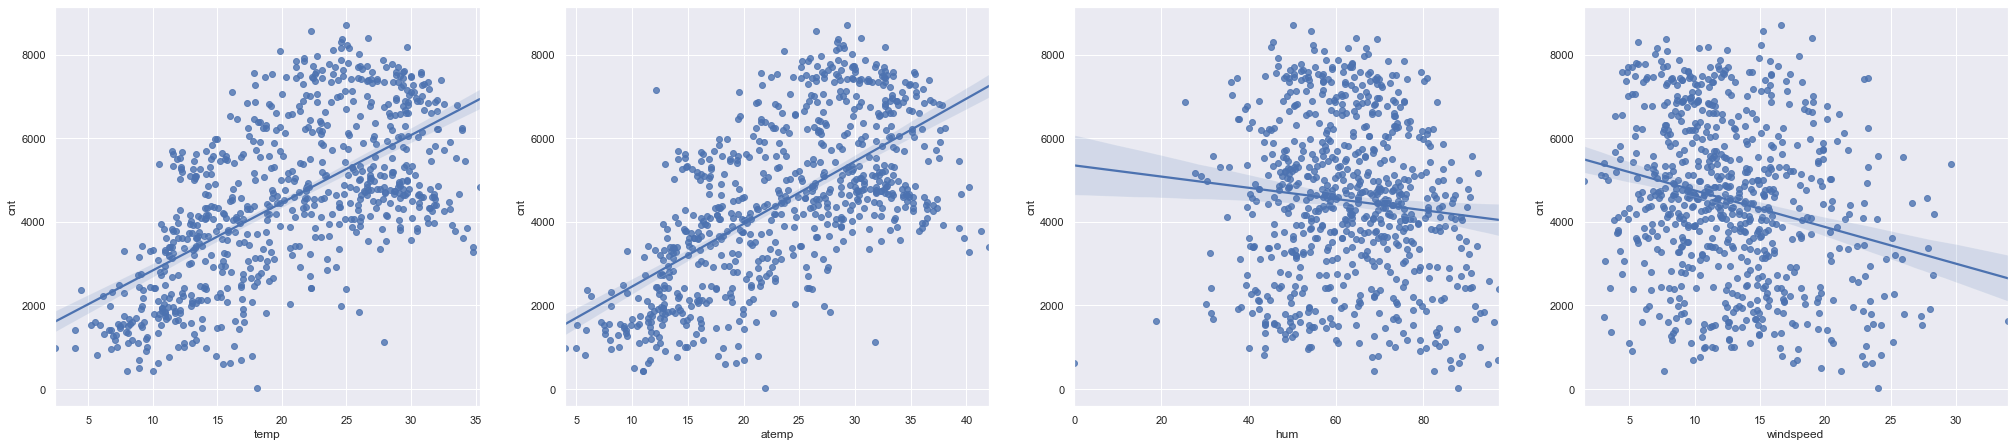

In [10]:
### Let's visualise the numerical variable with respect to our target variables

plt.figure(figsize=(35,25))
plt.subplot(3,4,1)
sns.regplot(x='temp', y='cnt', data=data)
plt.subplot(3,4,2)
sns.regplot(x='atemp', y='cnt', data=data)
plt.subplot(3,4,3)
sns.regplot(x='hum', y='cnt', data=data)
plt.subplot(3,4,4)
sns.regplot(x='windspeed', y='cnt', data=data)
plt.show()

##### Inferences

- 1. In the first diagram, we can see that the relatonship between the two that is temp and cnt is linear. We can see the best fitted line. The correlation among the 2 is positive too. If temp increases, cnt increases too.

- 2. In the second diagram, we can see that the relationship between the two that is atemp and cnt is linear. We can see the best fitted line. The correlation among the 2 is positive too.

- 3. In the third diagram, the relationship between hum and cnt is negatively correlated. When humidity  increases cnt decreases.

- 4. In the fourth diagram, the relationship between windspeed and cnt is negatively correlated. When weathsits increases, cnt decreases.


#### CORRELATION MATIRX

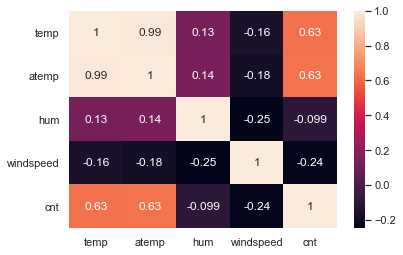

In [11]:
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True)
plt.show()

- From the above correlation matrix, we can infer that variables temp and atemp have a positive correlation with our target variable that is cnt both by 63%.
- We can even observe that atemp and temp are highly correlated with each other almost by 99%. 

### Encoding the features with dummy variables

In [12]:
data_dummy = pd.get_dummies(data[['yr','season','mnth','weathersit','holiday','workingday','weekday']], drop_first = True)
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   yr_2019                730 non-null    uint8
 1   season_spring          730 non-null    uint8
 2   season_summer          730 non-null    uint8
 3   season_winter          730 non-null    uint8
 4   mnth_aug               730 non-null    uint8
 5   mnth_dec               730 non-null    uint8
 6   mnth_feb               730 non-null    uint8
 7   mnth_jan               730 non-null    uint8
 8   mnth_july              730 non-null    uint8
 9   mnth_june              730 non-null    uint8
 10  mnth_mar               730 non-null    uint8
 11  mnth_may               730 non-null    uint8
 12  mnth_nov               730 non-null    uint8
 13  mnth_oct               730 non-null    uint8
 14  mnth_sept              730 non-null    uint8
 15  weathersit_Light Snow  730 non-null    u

In [13]:
#Concatinating dummy variables with actual data values

data = pd.concat([data,data_dummy], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                730 non-null    int64  
 1   dteday                 730 non-null    object 
 2   season                 730 non-null    object 
 3   yr                     730 non-null    object 
 4   mnth                   730 non-null    object 
 5   holiday                730 non-null    object 
 6   weekday                730 non-null    object 
 7   workingday             730 non-null    object 
 8   weathersit             730 non-null    object 
 9   temp                   730 non-null    float64
 10  atemp                  730 non-null    float64
 11  hum                    730 non-null    float64
 12  windspeed              730 non-null    float64
 13  casual                 730 non-null    int64  
 14  registered             730 non-null    int64  
 15  cnt   

In [14]:
#Dropping unwanted columns from the dataset

data = data.drop(['instant','dteday','yr','season','mnth','weathersit','holiday','workingday','weekday','casual','registered'], axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temp                   730 non-null    float64
 1   atemp                  730 non-null    float64
 2   hum                    730 non-null    float64
 3   windspeed              730 non-null    float64
 4   cnt                    730 non-null    int64  
 5   yr_2019                730 non-null    uint8  
 6   season_spring          730 non-null    uint8  
 7   season_summer          730 non-null    uint8  
 8   season_winter          730 non-null    uint8  
 9   mnth_aug               730 non-null    uint8  
 10  mnth_dec               730 non-null    uint8  
 11  mnth_feb               730 non-null    uint8  
 12  mnth_jan               730 non-null    uint8  
 13  mnth_july              730 non-null    uint8  
 14  mnth_june              730 non-null    uint8  
 15  mnth_m

Unwanted columns are deleted successfully

### Spliting the data into training and test set

Now, we will be splittting our dataset into training and test data by 70-30. 

In [16]:
train, test = train_test_split(data, train_size = 0.7)

In [17]:
print('The shape of the training dataset:', train.shape)
print('The shape of the test dataset:', test.shape)

The shape of the training dataset: (510, 30)
The shape of the test dataset: (220, 30)


### Feature scaling by using MinMax method

Now, we will scale all our numerical variables by 

In [18]:
scaler = MinMaxScaler()
train[train.columns] = scaler.fit_transform(train)
train[train.columns].head()

,temp,atemp,hum,windspeed,cnt,yr_2019,season_spring,season_summer,season_winter,mnth_aug,...,weathersit_Light Snow,weathersit_Mist,holiday_holiday,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
273,0.437201,0.438149,0.721189,0.534330,0.241217,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
607,0.878510,0.801141,0.509293,0.266479,0.835325,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
85,0.241625,0.224814,0.390011,0.300602,0.152360,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
674,0.276252,0.265805,0.483271,0.277256,0.634432,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
448,0.471467,0.470473,0.883165,0.379542,0.551129,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y_train = train.pop('cnt')
x_train = train

In [20]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [21]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr_2019', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', True, 1),
 ('mnth_aug', False, 16),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', False, 2),
 ('mnth_july', True, 1),
 ('mnth_june', False, 15),
 ('mnth_mar', False, 4),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('holiday_holiday', True, 1),
 ('workingday_workingday', False, 11),
 ('weekday_Mon', False, 5),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 10),
 ('weekday_Thurs', False, 12),
 ('weekday_Tues', False, 7),
 ('weekday_Wed', False, 8)]

In [22]:
col = x_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'yr_2019', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_nov', 'mnth_sept',
       'weathersit_Light Snow', 'weathersit_Mist', 'holiday_holiday'],
      dtype='object')

In [23]:
x_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'workingday_workingday',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed'],
      dtype='object')

# Building model using Statsmodel


##### Model 1

In [24]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [25]:
# Adding constant
x_train_sm = sm.add_constant(x_train_rfe)

#Running Linear regression model
lr = sm.OLS(y_train,x_train_sm).fit()

#Summary 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          2.82e-185
Time:                        18:39:46   Log-Likelihood:                 481.87
No. Observations:                 510   AIC:                            -933.7
Df Residuals:                     495   BIC:                            -870.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2951      0.029     10.076      0.000       0.238       0.353
temp                      0.3355      0.135      2.482      0.013       0.070       0.601
atemp                     0.1430      0.142      1.005      0.315      -0.136       0.422
hum                      -0.1640      0.034     -4.770      0.000      -0.232      -0.096
windspeed                -0.1272      0.028     -4.526      0.000      -0.182      -0.072
yr_2019                   0.2336      0.009     27.048      0.000       0.217       0.251
season_spring            -0.1325      0.016     -8.063      0.000      -0.165      -0.100
season_winter             0.0865      0.015      5.856      0.000       0.057       0.116
mnth_dec                 -0.0418      0.018     -2.360      0.019      -0.077      -0.007
mnth_july                -0.0718      0.017     -4.164      0.000      -0.106      -0.038
mnth_nov                 -0.0675      0.021     -3.266      0.001      -0.108      -0.027
mnth_sept                 0.0578      0.017      3.429      0.001       0.025       0.091
weathersit_Light Snow    -0.2110      0.031     -6.804      0.000      -0.272      -0.150
weathersit_Mist          -0.0569      0.012     -4.938      0.000      -0.080      -0.034
holiday_holiday          -0.0992      0.026     -3.785      0.000      -0.151      -0.048
==============================================================================
Omnibus:                       67.827   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.831
Skew:                          -0.830   Prob(JB):                     3.16e-25
Kurtosis:                       4.598   Cond. No.                         73.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model 2

Rebuilding model by dropping atemp variable since it has high p-value greater than 0.05

In [26]:
#Dropping atemp variable
x_train_rfe = x_train_rfe.drop('atemp', axis=1)

# Adding constant
x_train_sm = sm.add_constant(x_train_rfe)

#Running Linear regression model
lr = sm.OLS(y_train,x_train_sm).fit()

#Summary 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          3.26e-186
Time:                        18:40:55   Log-Likelihood:                 481.35
No. Observations:                 510   AIC:                            -934.7
Df Residuals:                     496   BIC:                            -875.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2973      0.029     10.182      0.000       0.240       0.355
temp                      0.4671      0.033     13.973      0.000       0.401       0.533
hum                      -0.1613      0.034     -4.705      0.000      -0.229      -0.094
windspeed                -0.1309      0.028     -4.693      0.000      -0.186      -0.076
yr_2019                   0.2336      0.009     27.041      0.000       0.217       0.251
season_spring            -0.1330      0.016     -8.095      0.000      -0.165      -0.101
season_winter             0.0873      0.015      5.914      0.000       0.058       0.116
mnth_dec                 -0.0417      0.018     -2.353      0.019      -0.076      -0.007
mnth_july                -0.0710      0.017     -4.122      0.000      -0.105      -0.037
mnth_nov                 -0.0672      0.021     -3.256      0.001      -0.108      -0.027
mnth_sept                 0.0568      0.017      3.375      0.001       0.024       0.090
weathersit_Light Snow    -0.2140      0.031     -6.932      0.000      -0.275      -0.153
weathersit_Mist          -0.0572      0.012     -4.962      0.000      -0.080      -0.035
holiday_holiday          -0.0999      0.026     -3.813      0.000      -0.151      -0.048
==============================================================================
Omnibus:                       66.785   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.373
Skew:                          -0.818   Prob(JB):                     6.54e-25
Kurtosis:                       4.602   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Calculating VIF for Model 2
vif = pd.DataFrame()
vif['Feature'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
1,hum,17.64
0,temp,13.43
2,windspeed,4.21
5,season_winter,2.57
11,weathersit_Mist,2.49
4,season_spring,2.39
3,yr_2019,2.03
8,mnth_nov,1.68
7,mnth_july,1.42
6,mnth_dec,1.38


##### Model 3
Dropping hum variable and rebuilding model as it have high VIF value

In [28]:
#Dropping atemp variable
x_train_rfe = x_train_rfe.drop('hum', axis=1)

# Adding constant
x_train_sm = sm.add_constant(x_train_rfe)

#Running Linear regression model
lr = sm.OLS(y_train,x_train_sm).fit()

#Summary 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.08e-182
Time:                        18:41:50   Log-Likelihood:                 470.22
No. Observations:                 510   AIC:                            -914.4
Df Residuals:                     497   BIC:                            -859.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2319      0.026      8.845      0.000       0.180       0.283
temp                      0.4274      0.033     12.941      0.000       0.363       0.492
windspeed                -0.0981      0.028     -3.559      0.000      -0.152      -0.044
yr_2019                   0.2396      0.009     27.475      0.000       0.222       0.257
season_spring            -0.1387      0.017     -8.291      0.000      -0.172      -0.106
season_winter             0.0783      0.015      5.241      0.000       0.049       0.108
mnth_dec                 -0.0465      0.018     -2.574      0.010      -0.082      -0.011
mnth_july                -0.0635      0.018     -3.626      0.000      -0.098      -0.029
mnth_nov                 -0.0702      0.021     -3.330      0.001      -0.112      -0.029
mnth_sept                 0.0515      0.017      3.008      0.003       0.018       0.085
weathersit_Light Snow    -0.2804      0.028    -10.005      0.000      -0.335      -0.225
weathersit_Mist          -0.0899      0.009     -9.577      0.000      -0.108      -0.071
holiday_holiday          -0.1004      0.027     -3.753      0.000      -0.153      -0.048
==============================================================================
Omnibus:                       69.777   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.413
Skew:                          -0.834   Prob(JB):                     7.12e-27
Kurtosis:                       4.697   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif = pd.DataFrame()
vif['Feature'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
0,temp,4.76
1,windspeed,4.20
4,season_winter,2.29
2,yr_2019,2.01
3,season_spring,1.73
7,mnth_nov,1.65
10,weathersit_Mist,1.56
6,mnth_july,1.39
5,mnth_dec,1.35
8,mnth_sept,1.20


##### Model selection

We will finalise Model 3 as our final training regression model becasue all features p-values are less than 0.05 and all features VIF value is less than 5

### Residual Analysis

In [30]:
y_train_pred = lr.predict(x_train_sm)

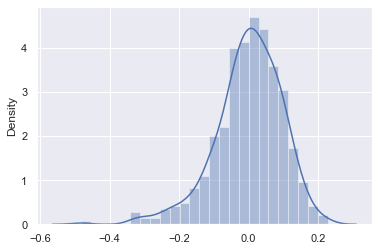

In [31]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

In [32]:
test[test.columns] = scaler.transform(test)
test[test.columns].head()

,temp,atemp,hum,windspeed,cnt,yr_2019,season_spring,season_summer,season_winter,mnth_aug,...,weathersit_Light Snow,weathersit_Mist,holiday_holiday,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
245,0.760136,0.727388,0.673925,0.302820,0.489315,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
214,0.838014,0.788720,0.598513,0.195167,0.379452,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
160,0.867088,0.819376,0.531598,0.205926,0.501630,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
184,0.831783,0.769660,0.573553,0.078074,0.677532,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
318,0.586727,0.562476,0.638343,0.333786,0.454425,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


##### Defining the independent variable and dependent variable

In [33]:
y_test = test.pop('cnt')
x_test = test[x_train_rfe.columns]

In [34]:
#Adding constant 
x_test_sm = sm.add_constant(x_test)

In [35]:
#predict
y_pred_test = lr.predict(x_test_sm)

In [36]:
#evaluating the model 
r2_score(y_test, y_pred_test)

0.826032277107402

- R-square of the training model is: 0.830
- R-square of the test model is: 0.826

We can say that our model is almost accurate

# Company's Questions

##### - Which variables are significant in predicting the demand for shared bikes?

The variables that are significant in predicting the demand for shared bikes are as follows:

In [37]:
lr.params

const                    0.231914
temp                     0.427438
windspeed               -0.098122
yr_2019                  0.239628
season_spring           -0.138726
season_winter            0.078315
mnth_dec                -0.046452
mnth_july               -0.063466
mnth_nov                -0.070198
mnth_sept                0.051538
weathersit_Light Snow   -0.280406
weathersit_Mist         -0.089855
holiday_holiday         -0.100384
dtype: float64

##### - How well those variables describe the bike demands?

cnt = 0.231 + temp * (0.427) + windspeed * (-0.098) + yr_2019 * (0.239) + season_spring * (-0.138) + season_winter * (0.078) + mnth_dec * (-0.046) + mnth_july * (-0.063) + mnth_nov * (-0.070) + mnth_sept * (0.051) + weathersit_Light Snow * (-0.280) + holiday_holiday * (-0.100) 

# My recommendation to the company

- Company should focus on expanding its busines in the month of september
- In the year 2019, the demand for shared price increased. And during 2019, the pandemic has not struck so things were going smooth and normal. But when pandemic came the demand decreased. So, I would recommend company to focus on expanding its business when things becomes back to normal.
- Ideal season for expanding its business is spring because from teh boxplot above we can see that the demand is increasing. 